# Common Probability Distributions in Machine Learning

This notebook explains **why specific probability distributions are repeatedly used in machine learning**, what assumptions they encode, and how they connect to real ML models.

---

## 1. Binomial Distribution

### What it models
The **Binomial distribution** models the number of successes in a fixed number of independent trials, where each trial has the same probability of success.

$$ X \sim \text{Binomial}(n, p) $$

- \(n\): number of trials  
- \(p\): probability of success in each trial  

### Key properties
- Discrete distribution
- Outcomes are counts: \(0, 1, 2, \dots, n\)
- Mean: \(np\)
- Variance: \(np(1-p)\)

### Why it matters in ML
- Binary classification labels are modeled as Bernoulli or Binomial variables.
- Logistic regression assumes the target follows a Bernoulli distribution.
- Cross-entropy loss arises from the Binomial likelihood.

### Typical use cases
- Success or failure modeling
- Click or conversion prediction
- Yes or no outcomes

---

## 2. Normal (Gaussian) Distribution

### What it models
The **Normal distribution** describes continuous variables that cluster symmetrically around a mean.

$$ X \sim \mathcal{N}(\mu, \sigma^2)$$

- $\mu$: mean  
- $\sigma^2$: variance  

### Key properties
- Continuous and symmetric
- Fully defined by mean and variance
- Most probability mass lies near the mean

### Why it matters in ML
- Measurement noise is often Gaussian.
- Linear regression assumes Gaussian residuals.
- Minimizing squared error is equivalent to maximizing Gaussian likelihood.

### Typical use cases
- Sensor noise
- Regression errors
- Natural phenomena

---

## 3. Uniform Distribution

### What it models
The **Uniform distribution** assigns equal probability to all values within a given range.

$$ X \sim \text{Uniform}(a, b) $$

### Key properties
- Continuous
- Constant density across the interval
- Mean: \((a+b)/2\)

### Why it matters in ML
- Used when no prior preference exists.
- Prevents bias during initialization.
- Ensures fair sampling.

### Typical use cases
- Random weight initialization
- Sampling in Monte Carlo methods
- Data shuffling

---

## 4. Poisson Distribution

### What it models
The **Poisson distribution** models the number of events occurring in a fixed interval of time or space.

$$ X \sim \text{Poisson}(\lambda)$$

- $\lambda$: average event rate

### Key properties
- Discrete distribution
- Mean equals variance ($\lambda$)
- Models rare or infrequent events

### Why it matters in ML
- Suitable for count data.
- Forms the basis of Poisson regression.
- Common in event prediction systems.

### Typical use cases
- Click counts
- Failure events
- Arrival modeling

---

## 5. Exponential Distribution

### What it models
The **Exponential distribution** models the time between consecutive events in a Poisson process.

$$ X \sim \text{Exponential}(\lambda) $$

### Key properties
- Continuous and right-skewed
- Memoryless property
- Mean: $1/\lambda$

### Why it matters in ML
- Models waiting times.
- Useful in survival analysis.
- Appears in reinforcement learning and reliability modeling.

### Typical use cases
- Time until failure
- Inter-arrival times
- Event duration modeling

---

## How These Distributions Fit into ML

| Distribution  | Data Type     | ML Role |
|---------------|---------------|---------|
| Binomial      | Discrete      | Classification labels |
| Normal        | Continuous    | Noise and residuals |
| Uniform       | Continuous    | Initialization |
| Poisson       | Discrete      | Count prediction |
| Exponential   | Continuous    | Time-to-event |

---

## Key Intuition Summary

- Distributions encode **assumptions about data generation**.
- Loss functions arise from **negative log-likelihoods** of these distributions.
- Choosing the right distribution improves model interpretability and performance.

These distributions form the **probabilistic backbone of machine learning**.


________
________
________




In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42) # reproducibility

### 2. Binomial Distribution

Used for: binary classification, success or failure modeling

Think of this as labels in a Bernoulli or logistic regression setting.

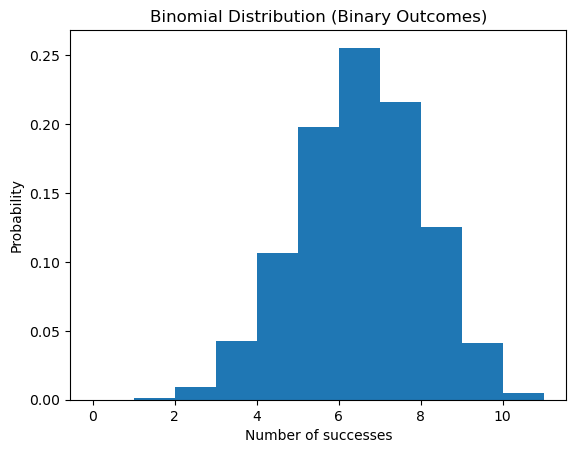

In [2]:
# Binomial: number of successes in n trails 
n = 10 # trials
p = 0.6 # probability of success
size = 10000

binomial_samples = np.random.binomial(n=n,p=p,size = size)

plt.hist(binomial_samples, bins = range(n+2),density = True)
plt.title("Binomial Distribution (Binary Outcomes)")
plt.xlabel("Number of successes")
plt.ylabel("Probability")
plt.show()


#### ML connection:
* Models label generation
* Logistic regression is built on Bernoulli/Binomial assumptions

### 3. Normal (Gaussian) Distribution

Used for: measurement noise, regression residuals

This is the most common assumption in ML.

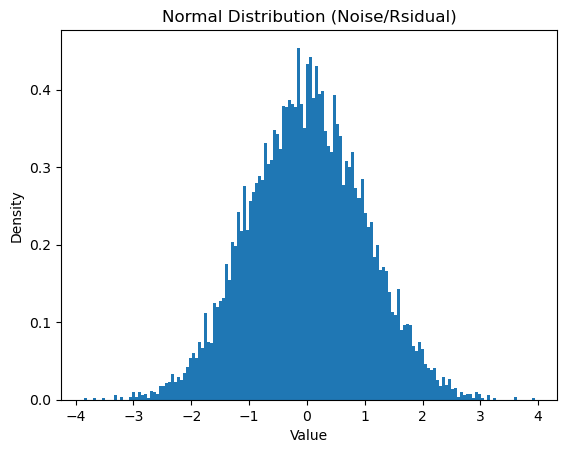

In [4]:
mean = 0
std = 1
size = 10000

normal_samples = np.random.normal(mean,std,size)

plt.hist(normal_samples, bins = 150, density=True)
plt.title("Normal Distribution (Noise/Rsidual)")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

#### ML connection:
* Linear regression assumes Gaussian residuals
* Basis of L2 loss and least squares

### 4. Uniform Distribution

Used for: random initialization, sampling

Often used when we do not want to bias initial values.

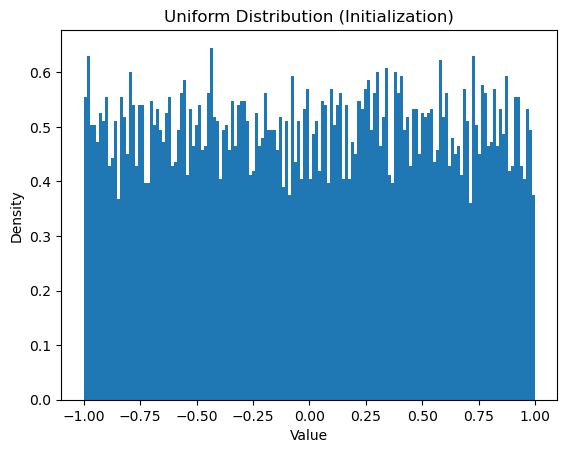

In [6]:
low = -1
high = 1
size = 10000

uniform_samples = np.random.uniform(low,high,size)

plt.hist(uniform_samples,bins=150,density =True)
plt.title("Uniform Distribution (Initialization)")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

#### ML connection:
* Weight initialization
* Random sampling in Monte Carlo methods

### 5. Poisson Distribution

Used for: rare events, count data

Typical for event counts per unit time.

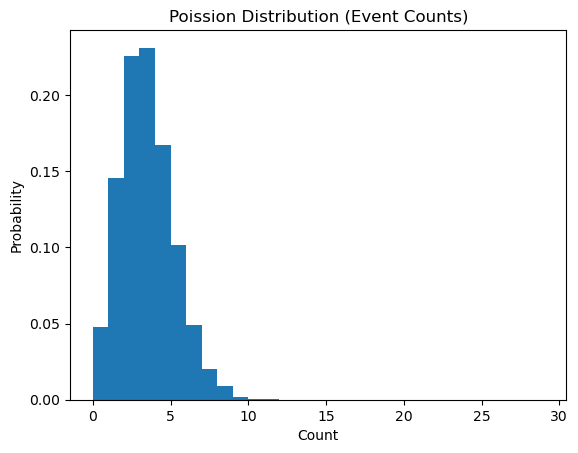

In [21]:
lam = 3 # average rate
size = 10000

poisson_samples = np.random.poisson(lam,size)

plt.hist(poisson_samples,bins = range(30),density=True)
plt.title("Poission Distribution (Event Counts)")
plt.xlabel("Count")
plt.ylabel("Probability")
plt.show()

#### ML connection:
* Click prediction
* Failure rates
* Poisson regression

### 6. Exponential Distribution

Used for: time between events

Models waiting times.

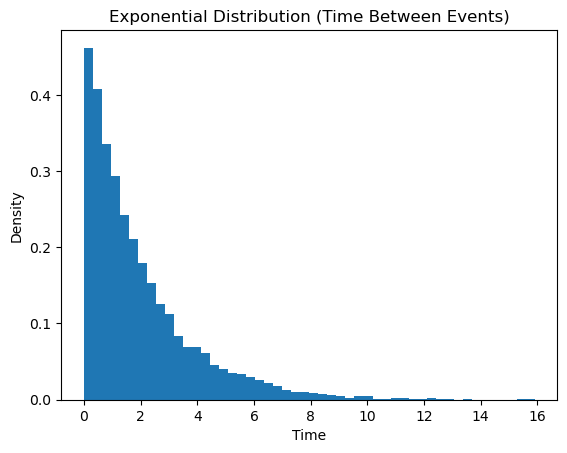

In [22]:
scale = 2.0 # mean waiting time
size = 10_000

exponential_samples = np.random.exponential(scale,size)

plt.hist(exponential_samples,bins = 50,density=True)
plt.title("Exponential Distribution (Time Between Events)")
plt.xlabel("Time")
plt.ylabel("Density")
plt.show()

#### ML connection:
* Survival analysis
* Event timing models
* Reinforcement learning waiting times

#### Key ML Takeaway
* Binomial → labels and classification
* Normal → noise, residuals, regression
* Uniform → unbiased initialization
* Poisson → count-based prediction
* Exponential → temporal event modeling